# Linear Programming Maximization Template

## Table of Contents
1. [Data Entry](#data-entry)
2. [Display Problem Data](#display-problem-data)
3. [Build and Solve the Model](#build-and-solve-the-model)
4. [Display Solution Table](#display-solution-table)
5. [Graphed Solution (Feasible Region and Optimal Point)](#graphed-solution-feasible-region-and-optimal-point)
6. [Visualize Solution (Bar Chart)](#visualize-solution-bar-chart)
7. [Visualize Solution (Horizontal Bar Chart)](#visualize-solution-horizontal-bar-chart)
8. [Notes](#notes)

# Linear Programming Maximization Template

This notebook helps you solve maximization linear programming problems with 3 or 4 variables using PuLP.  
**Instructions:**  
- Enter your problem data in the "Data Entry" cell below.  
- Run each cell in order.  
- The notebook will display your variables, constraints, the optimal solution, and a bar chart of the results.

---

## 1. Data Entry <a id="data-entry"></a>

**Edit only this cell to define your problem.**  
- `var_names`: List your variable names (e.g., `['x1', 'x2', 'x3']` or `['x1', 'x2', 'x3', 'x4']`)
- `objective_coefs`: Coefficients for the objective function (same order as `var_names`)
- `bounds`: Lower and upper bounds for each variable (use `None` for no upper bound)
- `constraints`: Each constraint is a tuple: (list of coefficients, sense, RHS).  
  - Senses: `'<='`, `'>='`, or `'='`
  - Coefficient lists must match the number of variables.

In [4]:
# --- DATA ENTRY ---

# Variable names
var_names = ['x1', 'x2', 'x3']

# Objective coefficients (maximize 40x1 + 30x2 + 25x3)
objective_coefs = [40, 30, 25]

# Variable bounds (lower, upper) for each variable
bounds = [(0, None)] * 3  # All variables >= 0

# Constraints: ([coefs], sense, rhs)
constraints = [
    ([2, 3, 1], '<=', 100),  # 2x1 + 3x2 + 1x3 <= 100
    ([1, 2, 3], '<=', 80),   # 1x1 + 2x2 + 3x3 <= 80
    ([3, 1, 2], '<=', 90)    # 3x1 + 1x2 + 2x3 <= 90
]

## 2. Display Problem Data <a id="display-problem-data"></a>

This cell displays your vaiables and constraints as tables for easy review. 

In [5]:
import pandas as pd

# Variables table
var_df = pd.DataFrame({
    'Variable': var_names,
    'Objective Coef': objective_coefs,
    'Lower Bound': [b[0] for b in bounds],
    'Upper Bound': [b[1] for b in bounds]
})
display(var_df)

# Constraints table
con_data = []
for i, (coefs, sense, rhs) in enumerate(constraints):
    row = {var_names[j]: coefs[j] for j in range(len(var_names))}
    row['Sense'] = sense
    row['RHS'] = rhs
    con_data.append(row)
con_df = pd.DataFrame(con_data)
display(con_df)

,Variable,Objective Coef,Lower Bound,Upper Bound
0,x1,40,0,None
1,x2,30,0,None
2,x3,25,0,None


,x1,x2,x3,Sense,RHS
0,2,3,1,<=,100
1,1,2,3,<=,80
2,3,1,2,<=,90


## 3. Build and Solve the Model <a id="build-and-solve-the-model"></a>
This cell builds and solves the maximization problem using PuLP.

In [6]:
import pulp as pl

# Create the model
model = pl.LpProblem("Maximization_Problem", pl.LpMaximize)

# Create variables
vars = [pl.LpVariable(var_names[i], lowBound=bounds[i][0], upBound=bounds[i][1]) for i in range(len(var_names))]

# Add objective function
model += pl.lpSum([objective_coefs[i] * vars[i] for i in range(len(var_names))]), "Objective"

# Add constraints
for i, (coefs, sense, rhs) in enumerate(constraints):
    expr = pl.lpSum([coefs[j] * vars[j] for j in range(len(var_names))])
    if sense == '<=':
        model += (expr <= rhs, f"Constraint_{i+1}")
    elif sense == '>=':
        model += (expr >= rhs, f"Constraint_{i+1}")
    elif sense == '=':
        model += (expr == rhs, f"Constraint_{i+1}")

# Solve the model
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/aiopt/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/b28e9ab8562249ea85b4e791a196f5d4-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/b28e9ab8562249ea85b4e791a196f5d4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 21 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 3 rows, 3 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 3 (0) columns and 9 (0) elements
0  Obj -0 Dual inf 95 (3)
0  Obj -0 Dual inf 95 (3)
3  Obj 1491.6667
Optimal - objective value 1491.6667
Optimal objective 1491.666667 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.

1

## 4. Display Solution Table <a id="display-solution-table"></a>

This cell prints the optimal soluiton in a table.

In [7]:
# Solution table
solution_df = pd.DataFrame({
    'Variable': var_names,
    'Optimal Value': [v.varValue for v in model.variables()]
})
display(solution_df)

print(f"Objective Value: {pl.value(model.objective):.2f}")
print(f"Status: {pl.LpStatus[model.status]}")

,Variable,Optimal Value
0,x1,18.333333
1,x2,18.333333
2,x3,8.333333


Objective Value: 1491.67
Status: Optimal


## 5. Graphed Solution (Feasible Region and Optimal Point) <a id="graphed-solution-feasible-region-and-optimal-point"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Only works for 2 variables!
if len(var_names) == 2:
    x1 = np.linspace(0, max([rhs/coef[0] if coef[0] else 0 for coef, _, rhs in constraints])*1.2, 400)
    plt.figure(figsize=(8,6))

    # Plot each constraint
    for i, (coefs, sense, rhs) in enumerate(constraints):
        if coefs[1] != 0:
            y = (rhs - coefs[0]*x1) / coefs[1]
            plt.plot(x1, y, label=f"Constraint {i+1}: {coefs[0]}*x1 + {coefs[1]}*x2 {sense} {rhs}")
        else:
            plt.axvline(rhs/coefs[0], label=f"Constraint {i+1}: x1 = {rhs/coefs[0]}")

    # Fill feasible region (brute force grid)
    X, Y = np.meshgrid(x1, x1)
    feasible = np.ones_like(X, dtype=bool)
    for coefs, sense, rhs in constraints:
        if sense == '<=':
            feasible &= (coefs[0]*X + coefs[1]*Y <= rhs)
        elif sense == '>=':
            feasible &= (coefs[0]*X + coefs[1]*Y >= rhs)
        elif sense == '=':
            feasible &= (np.isclose(coefs[0]*X + coefs[1]*Y, rhs))
    plt.contourf(X, Y, feasible, levels=[0.5, 1], colors=['#d0f0d0'], alpha=0.5)

    # Plot optimal point
    opt_x = [v.varValue for v in model.variables()]
    plt.plot(opt_x[0], opt_x[1], 'ro', label='Optimal Solution')

    # Plot objective function line (z = optimal value)
    z = pl.value(model.objective)
    if objective_coefs[1] != 0:
        y_obj = (z - objective_coefs[0]*x1) / objective_coefs[1]
        plt.plot(x1, y_obj, 'k--', label='Objective (z)')

    plt.xlim(0, max(x1))
    plt.ylim(0, max(x1))
    plt.xlabel(var_names[0])
    plt.ylabel(var_names[1])
    plt.legend()
    plt.title('Feasible Region and Optimal Solution')
    plt.grid(True)
    plt.show()
else:
    print("Feasibility region plot is only available for 2-variable problems.")

## 6. Visualize Solution (Bar Chart) <a id="visualize-solution-bar-chart"></a>

This cell creates a bar chart of optimal variable values. 

import matplotlib.pyplot as plt

var_values = [v.varValue for v in model.variables()]
plt.figure(figsize=(8, 5))
bars = plt.bar(var_names, var_values)
plt.xlabel('Variables')
plt.ylabel('Optimal Value')
plt.title('Optimal Solution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

## 7. Visualize Solution (Horizontal Bar Chart) <a id="visualize-solution-horizontal-bar-chart"></a>

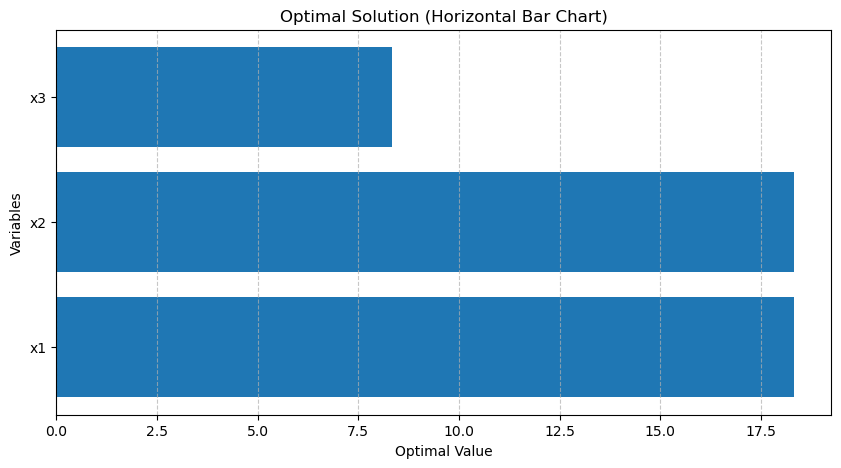

In [10]:
import matplotlib.pyplot as plt

var_values = [v.varValue for v in model.variables()]
plt.figure(figsize=(10, max(5, len(var_names) * 0.5)))
plt.barh(var_names, var_values)
plt.xlabel('Optimal Value')
plt.ylabel('Variables')
plt.title('Optimal Solution (Horizontal Bar Chart)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 8. Notes <a id="notes"></a>